# Project Name:- Baseball Case Study
***************************************************************

# Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


# Problem Statement:-
This project uses data from the 2014 Major League Baseball season to predict the number of wins a team will have in the 2015 season based on various statistics. The goal was to create a model that could take inputs like runs scored, hits, home runs, and more, to predict how many games a team would win.

# Input Features:-

# Output: Number of predicted wins (W)
To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics


In [131]:
# importing all the liabraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# importing dataset
df= pd.read_csv("E:/Fitness/baseball.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
df.isnull().sum()
# No Null Values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [7]:
df.sample(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85
19,64,640,5571,1382,257,27,167,496,1255,134,754,700,4.33,2,8,35,90
12,85,661,5417,1331,243,21,176,435,1150,52,675,630,3.94,2,12,46,93
16,98,697,5631,1462,292,27,140,461,1322,98,596,532,3.21,0,13,54,122
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
14,68,694,5600,1405,277,46,146,475,1119,78,729,664,4.14,5,15,28,126


In [7]:
print("Number of columns:",df.shape[0])
print("Number of Rows:",df.shape[1])

Number of columns: 30
Number of Rows: 17


In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Comment:- The column names in our dataset appear to be obscure and require interpretation to become comprehensible. To enhance our understanding of the  various columns in the dataset, We will change column names with referenced terminology from given pdf 

In [17]:
# Renaming the columns
df.rename(columns={'W' : 'Wins', 'R': 'Runs Scored', 'AB': 'At Bat', 'H': 'Hits', '2B': 'Doubles', '3B': 'Triples', 'HR':'Home Runs', 'BB': 'Base On Balls', 'SO': 'Strike Outs', 'SB':'Stole Base', 'RA':'Runs Average', 'ER': 'Earned Runs', 'ERA':'Earned Run Average', 'CG': 'Complete Game', 'SHO':'Shut Outs', 'SV': 'Saves', 'E' : 'Errors'}, inplace= True)

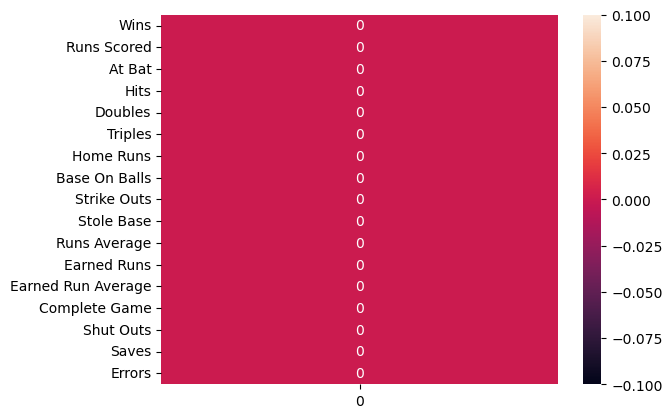

In [19]:
# Checking Null Values Through Heatmap
sns.heatmap(df.isnull().sum().to_frame(),annot= True)
plt.show()

We can see Names are Renamed Now we can get better understanding of dataset

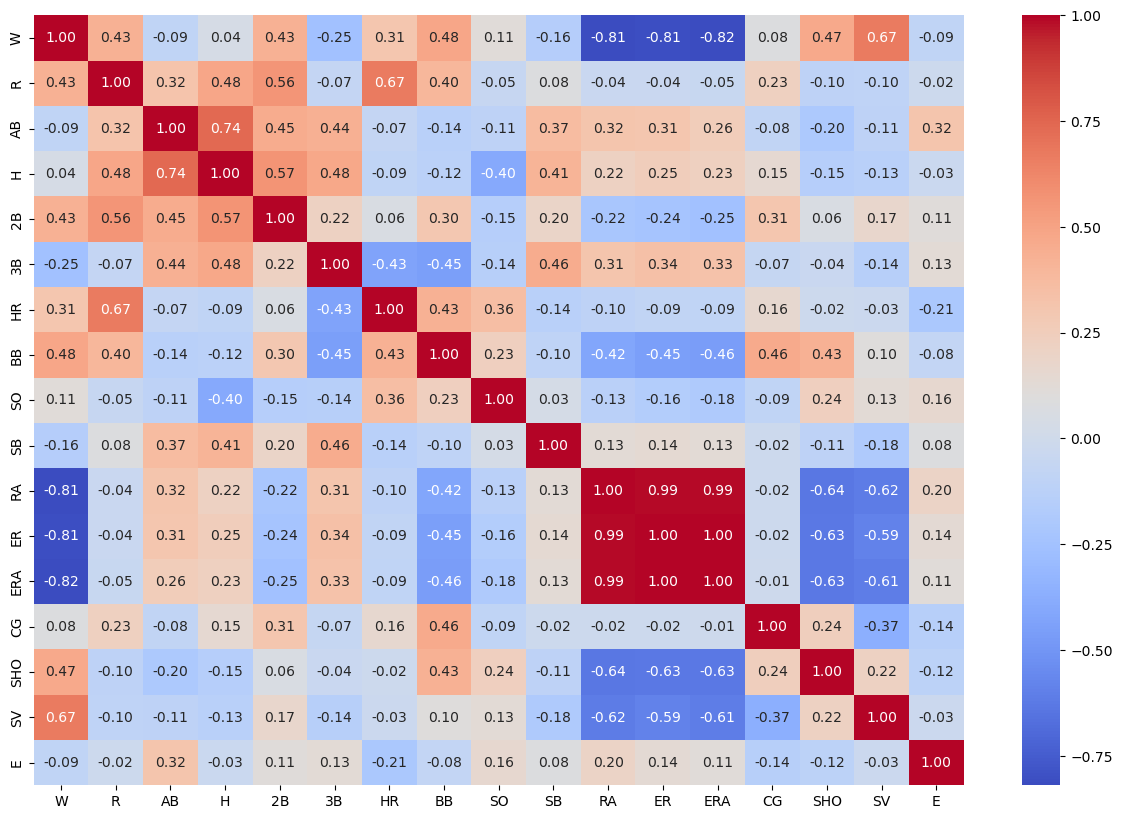

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot= True , cmap= 'coolwarm', fmt= ".2f") 
plt.show()

# Comment :- 
We can observe the correlation of Dataset through this heatmap
'Runs Average', 'Earned Runs' and 'Earned Run Average' have strong correlation. and these columns have negative correlation to column (Wins) which is our Target column

# EDA - Outlier Detection

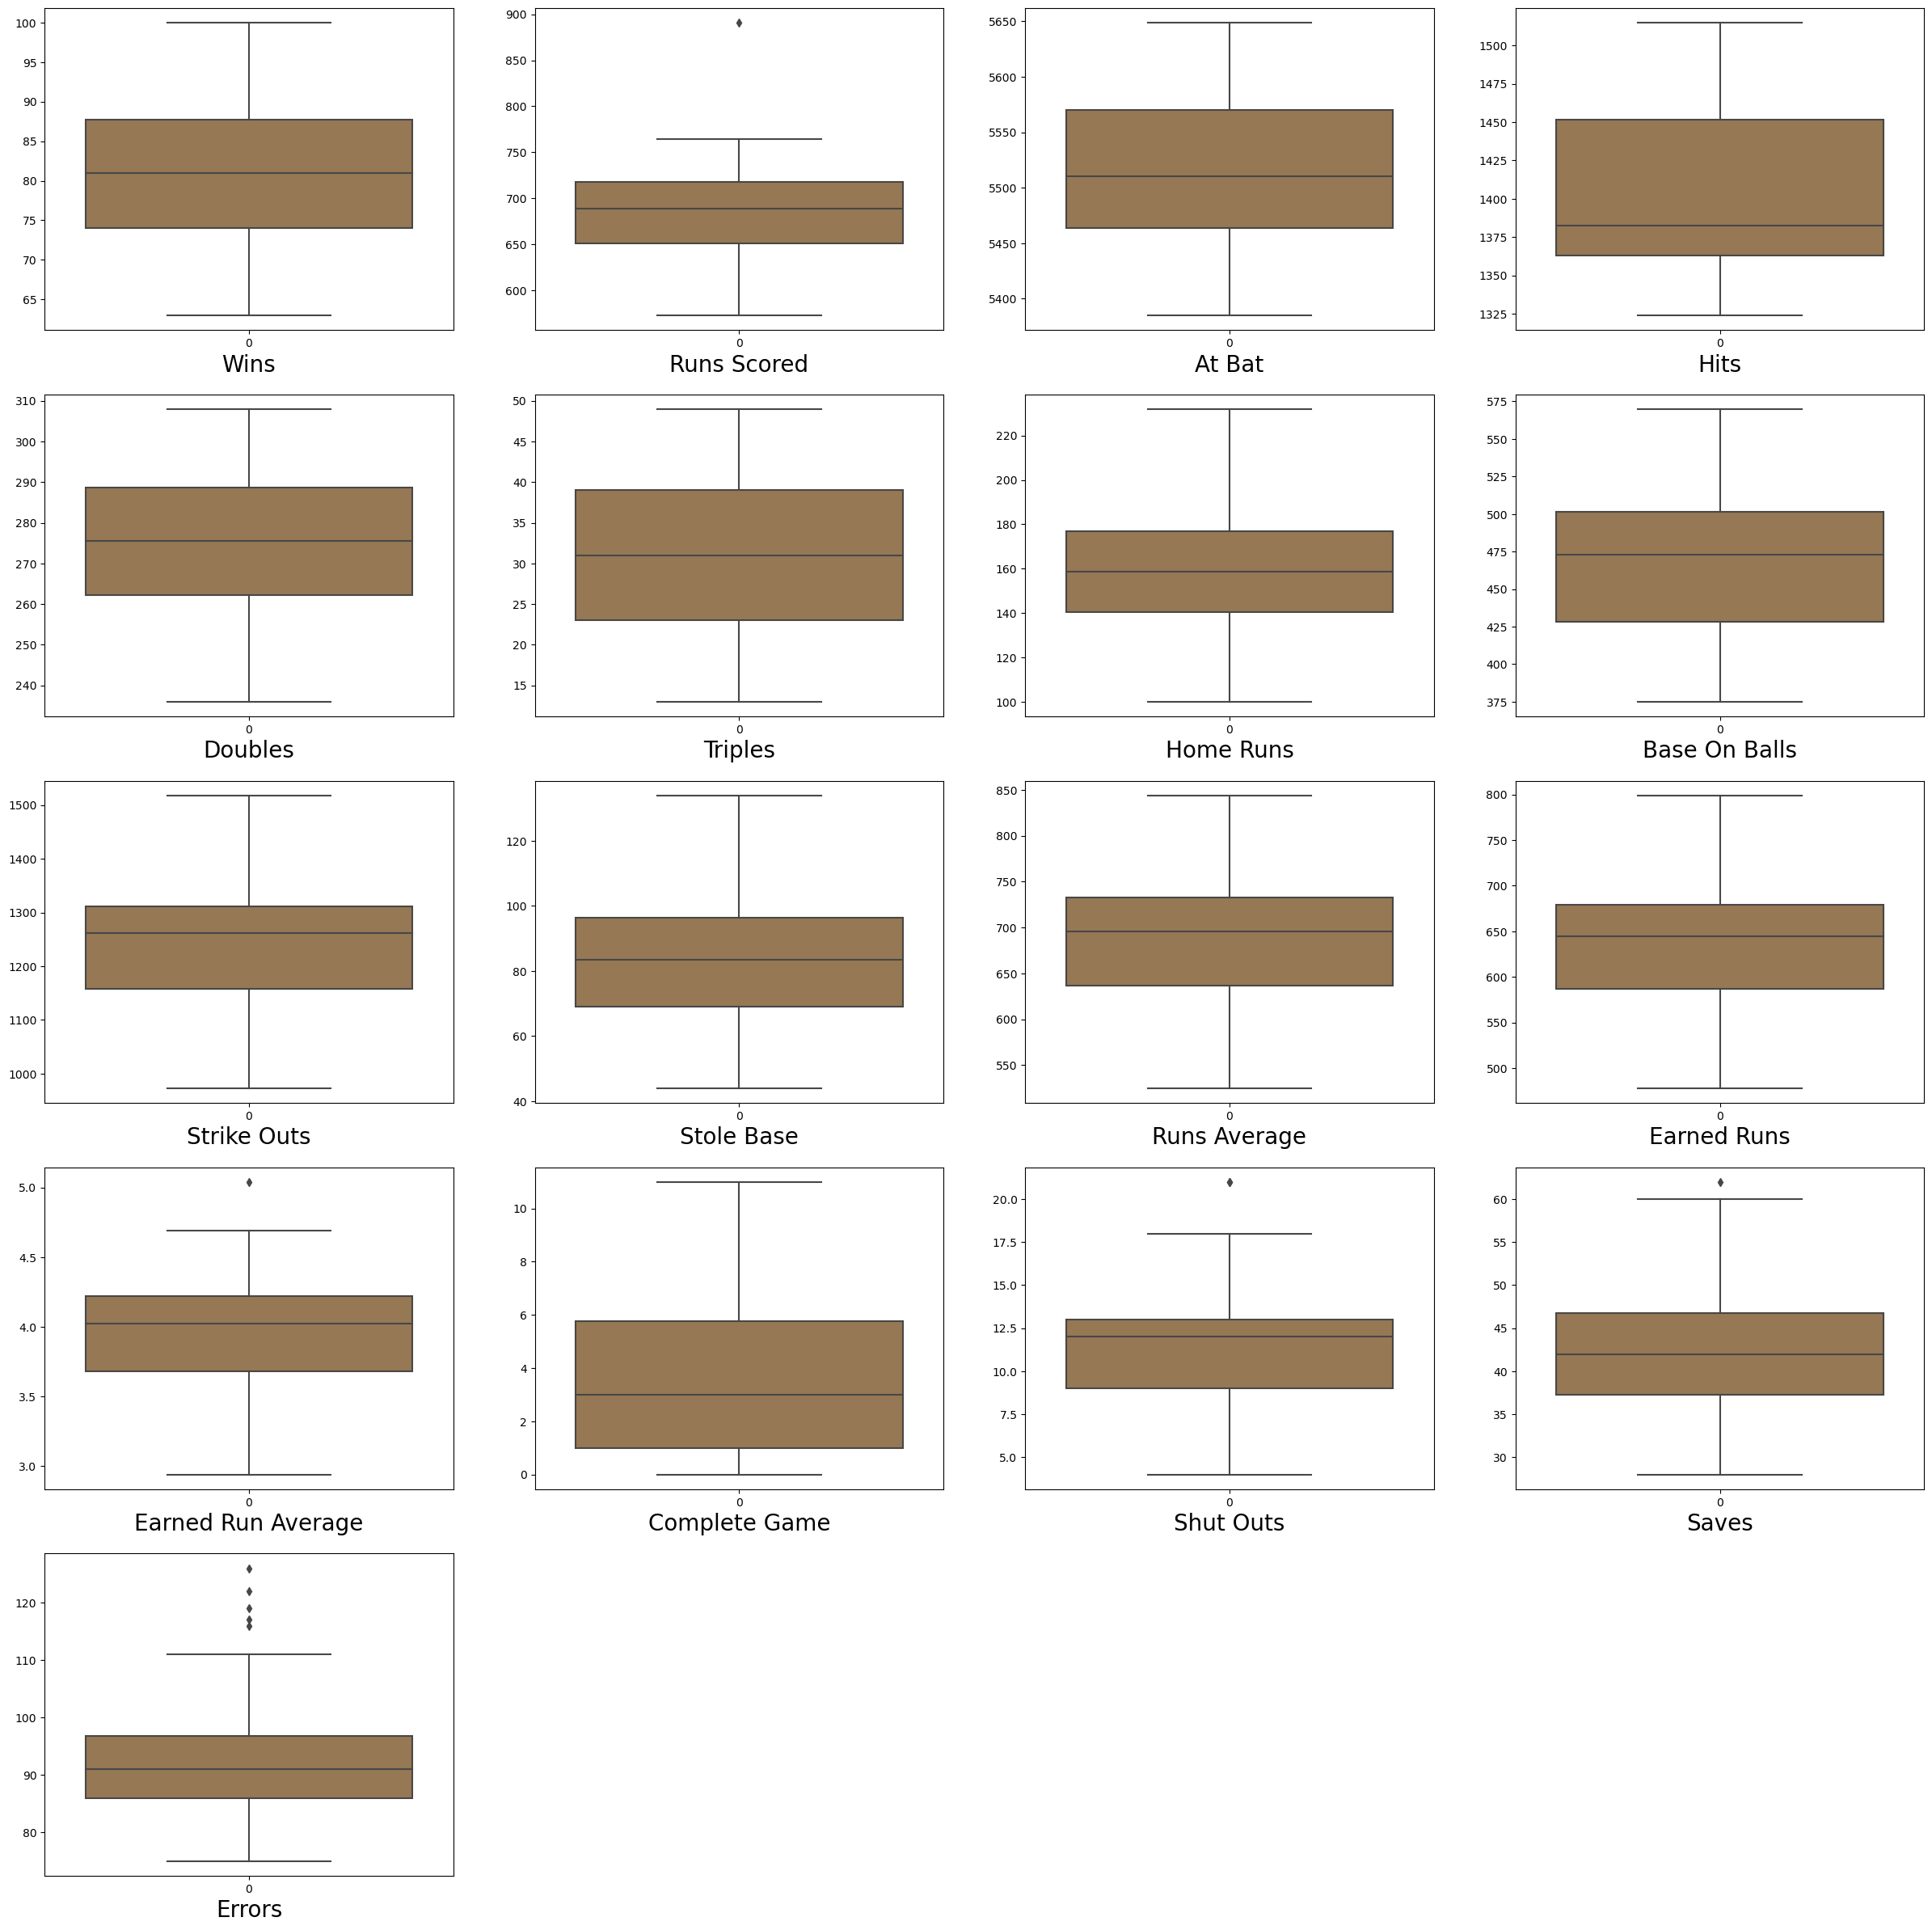

In [38]:
plt.figure(figsize= (30,30))
index = 1
for column in df:
    if index <=17:
        ax= plt.subplot(5,4,index)
        sns.boxplot(df[column], palette= 'cubehelix')
        plt.xlabel(column, fontsize= 20)
    index +=1
plt.show()

# Comment:-
We can easily find out outlieer in ('Runs sscored', ' Earned Run Average', 'Shut Outs', 'Saves' and 'Errors') that columns & Errors columns have highest outliers

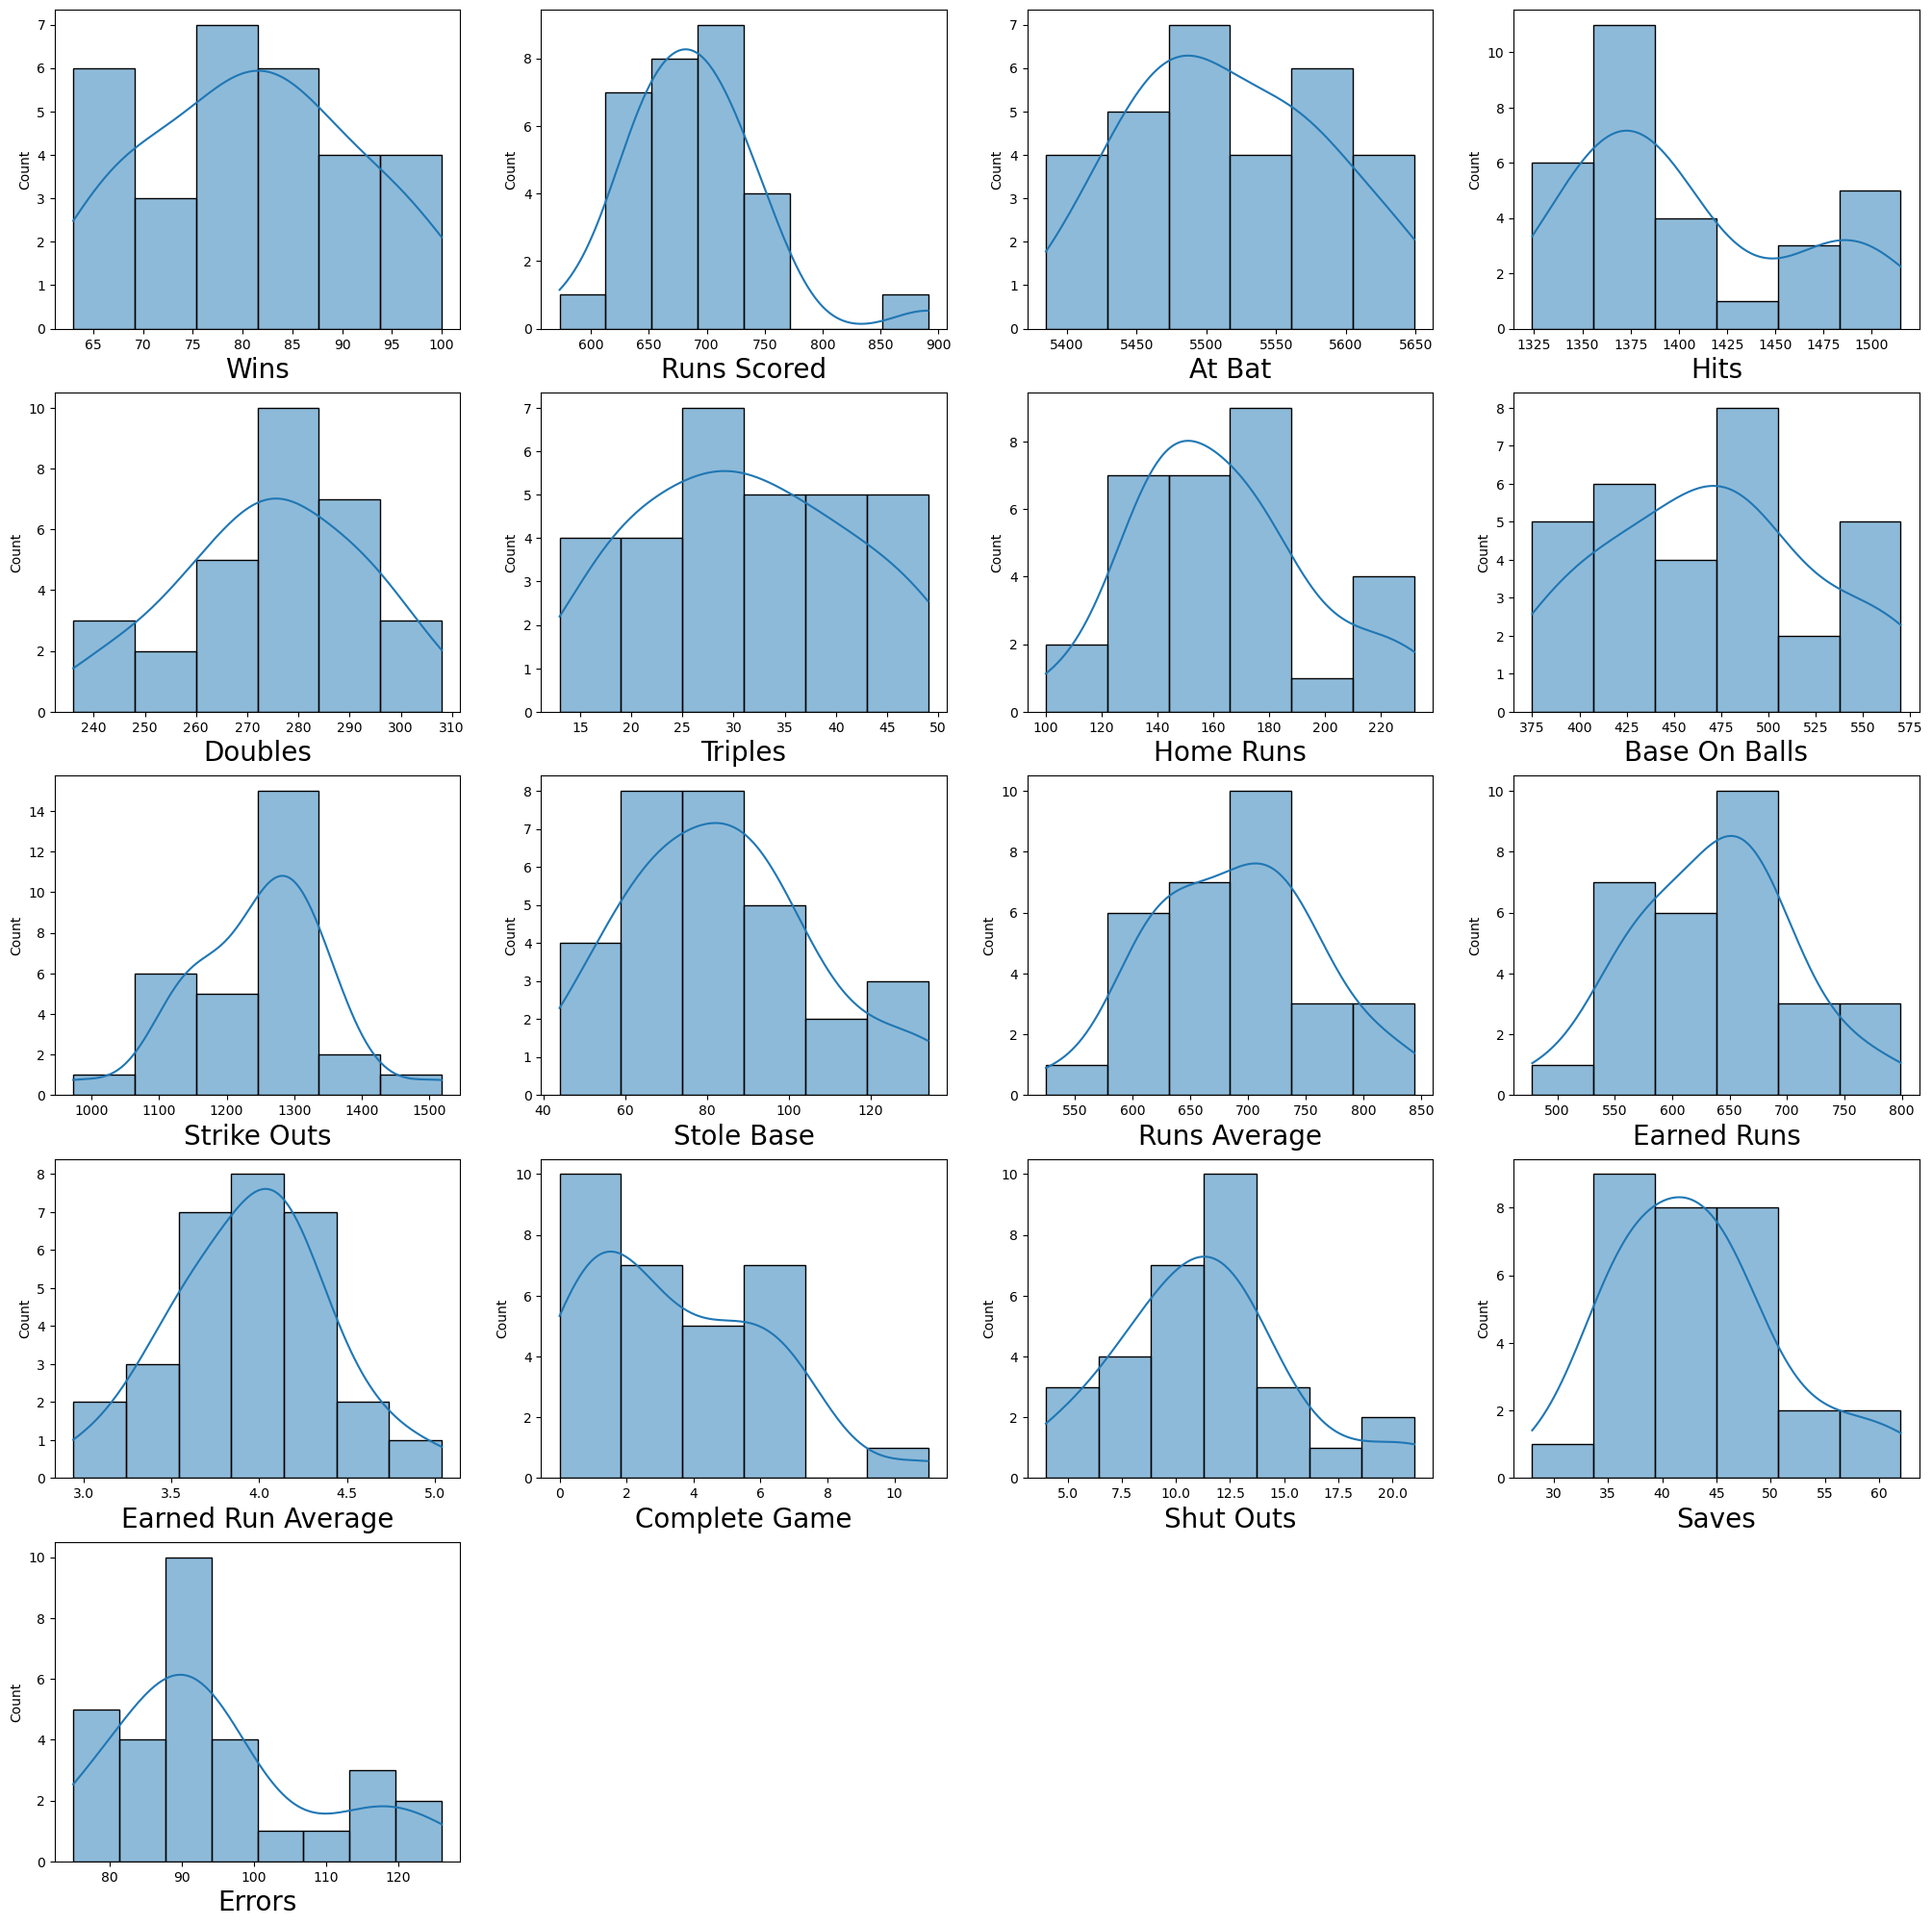

In [48]:
plt.figure(figsize= (25,25))
index = 1
for column in df:
    if index <=17:
        ax= plt.subplot(5,4,index)
        sns.histplot(df[column], kde= True)
        plt.xlabel(column, fontsize= 20)
    index +=1
plt.show()

# Comment:-
With the help Of Histogram & Kde curve we can assess the distribution and the skewness of all the columns

# Outlier Removal :-
We Have to remove outliers because outliers will affect on final model output

In [53]:
from scipy.stats import zscore

In [55]:
z_scores = np.abs(zscore(df))
threshold = 3
df1= df[(z_scores < threshold).all(axis=1)]

In [58]:
print('Shape of dataset before removing outliers: ',df.shape)
print('Shape of dataset after removing outliers: ',df1.shape)


Shape of dataset before removing outliers:  (30, 17)
Shape of dataset after removing outliers:  (29, 17)


In [59]:
# Data loss percentage

print('Percentage Data Loss:', ((30-29)/30)*100, '%')

Percentage Data Loss: 3.3333333333333335 %


# Comment:- 
We Removed Outliers and It was only 3% So this will not going to affect On our dataset 

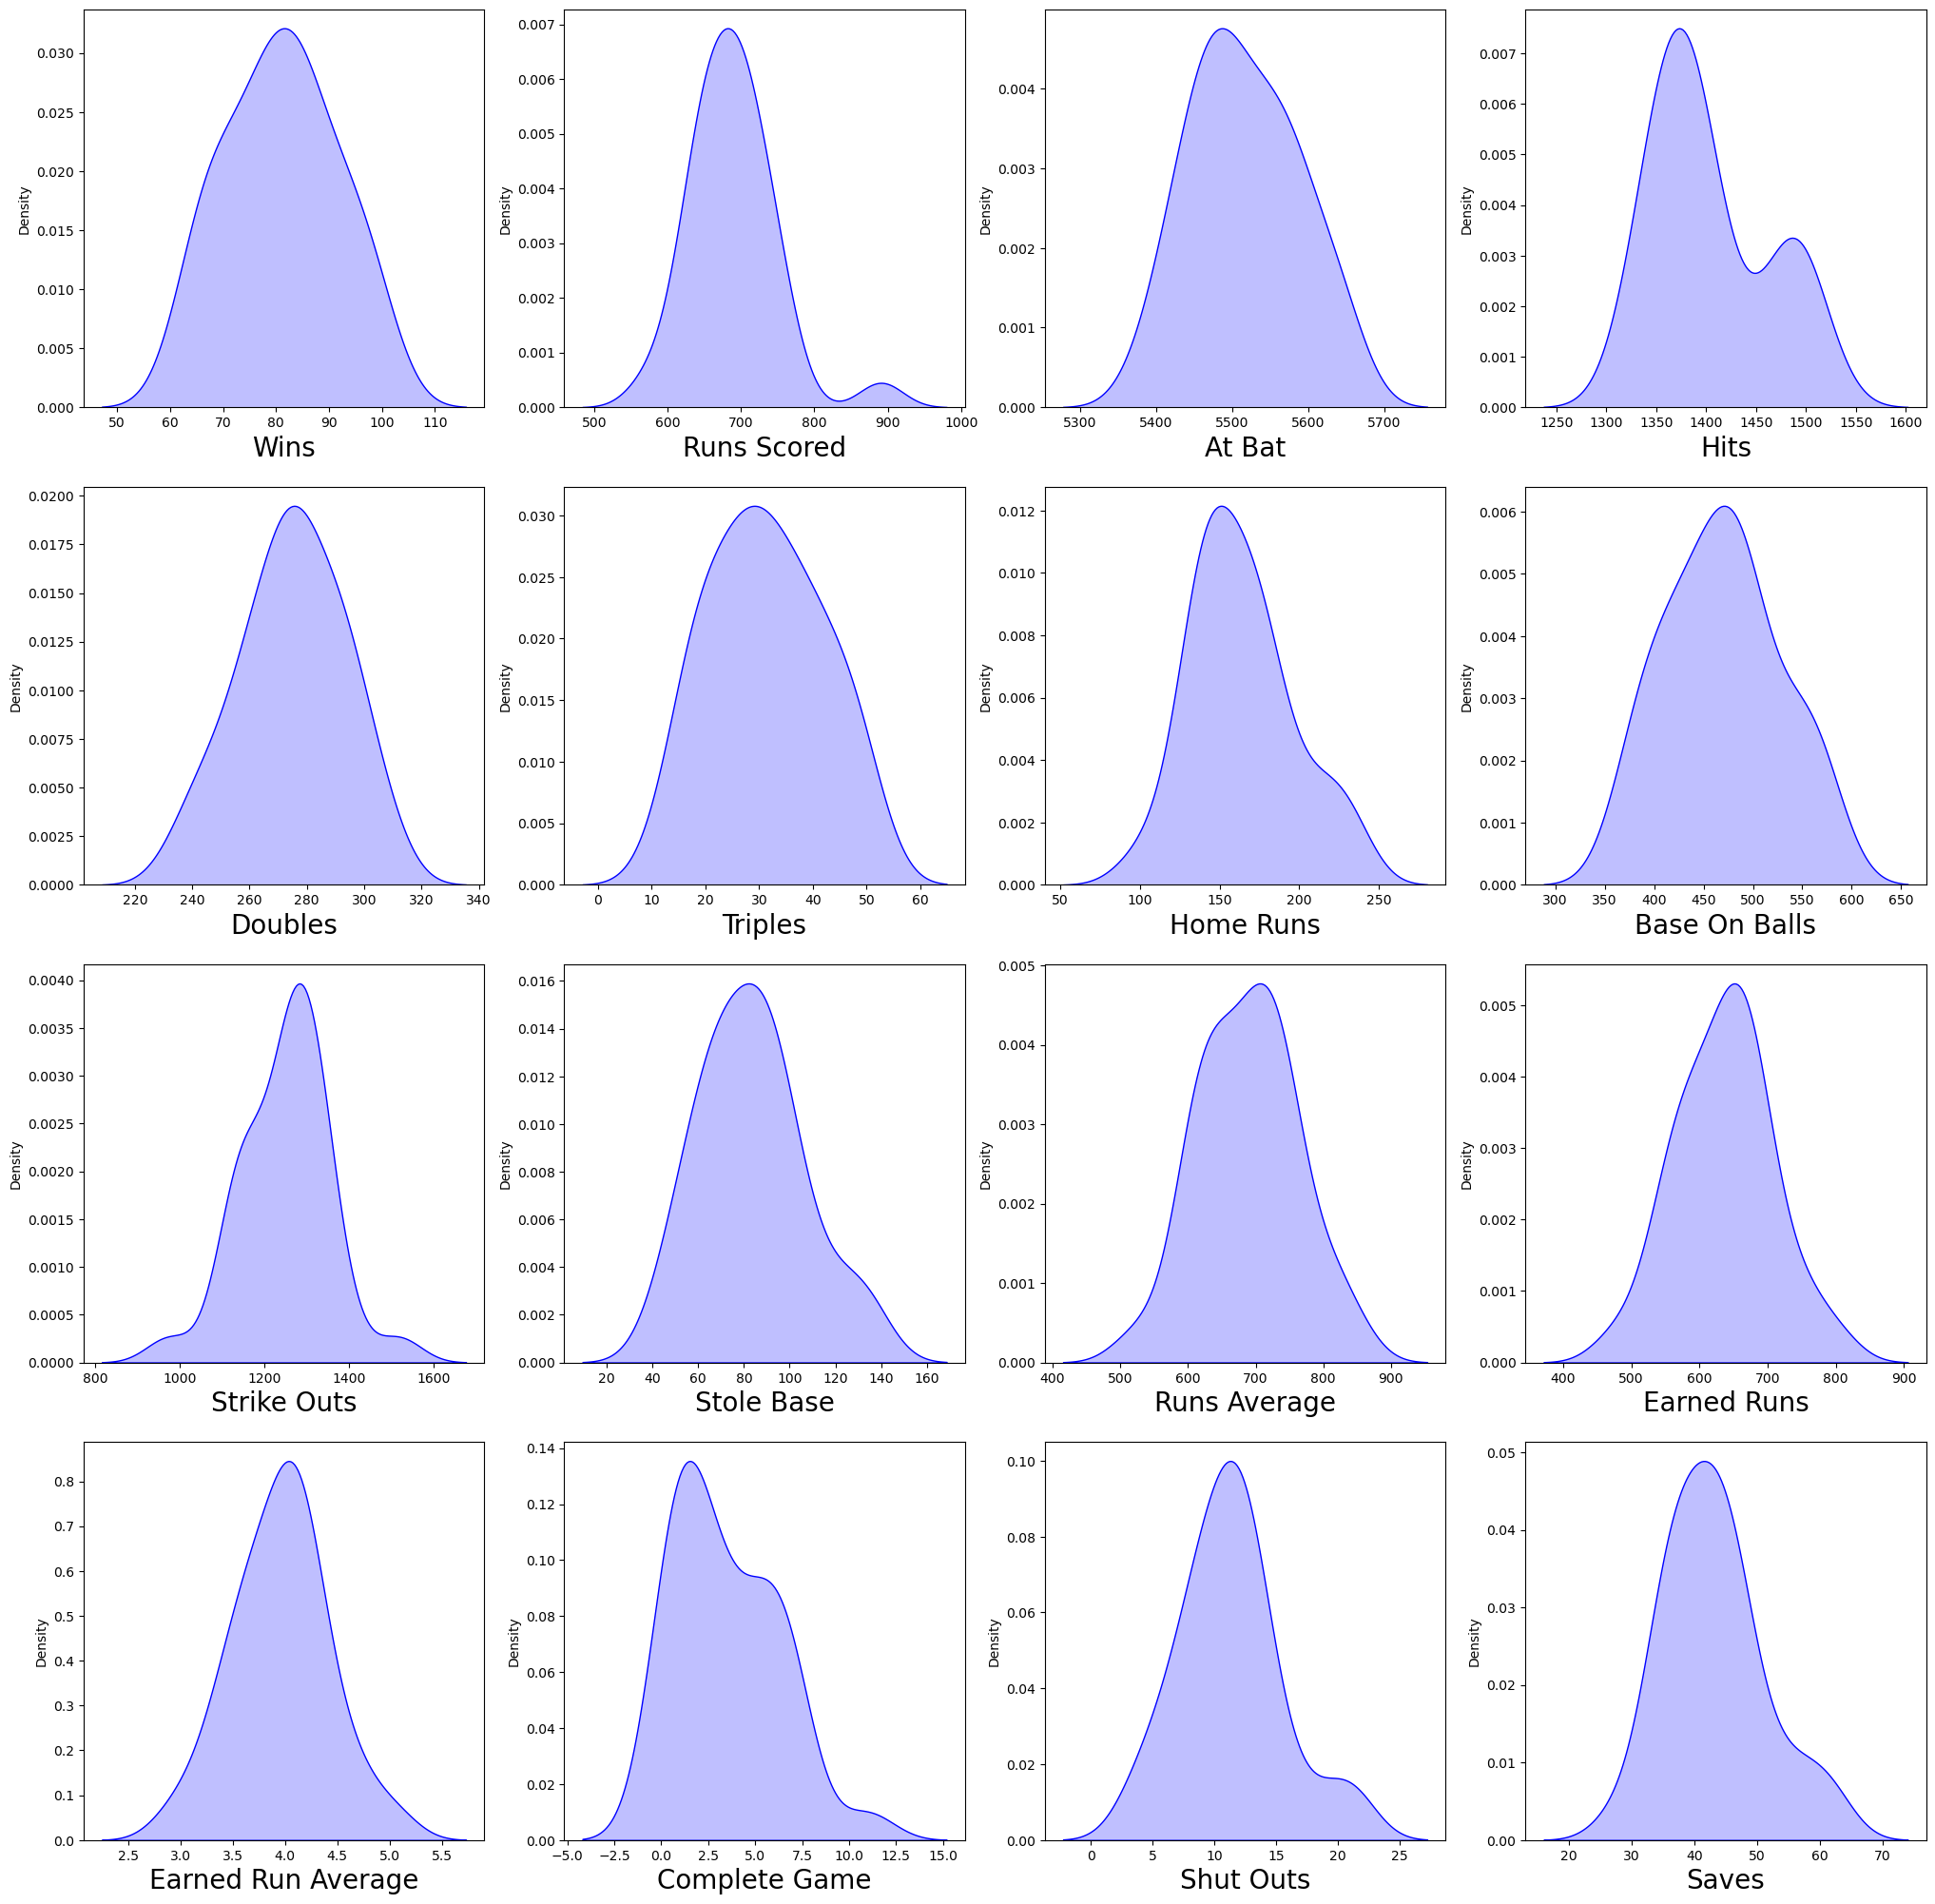

In [69]:
# Visualization Of Skewness

plt.figure(figsize=(25,25))
plotnumber=1
for column in df:
    if plotnumber <=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.kdeplot(df[column], color ='b',fill=True)
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

# Comment:-
'Runs Scored' , 'Compplete Game' , ' Shur Outs' , and 'Errors' These are the columns which Have slight skewness and it will need to be treated accordingly. Rest columns are normally distributed.

In [70]:
# Checking skewness with the range
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base On Balls         0.151193
Strike Outs          -0.233815
Stole Base            0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

# Comment:-
The optimal range for skewness is -0.5 to 0.5
Hits, Complete Games , Shut Outs, Save, Errors are positively Skewed

In [71]:
df1.columns

Index(['Wins', 'Runs Scored', 'At Bat', 'Hits', 'Doubles', 'Triples',
       'Home Runs', 'Base On Balls', 'Strike Outs', 'Stole Base',
       'Runs Average', 'Earned Runs', 'Earned Run Average', 'Complete Game',
       'Shut Outs', 'Saves', 'Errors'],
      dtype='object')

# Removing Skewness :- Using LOGARITHMIC TRANSFORMATION

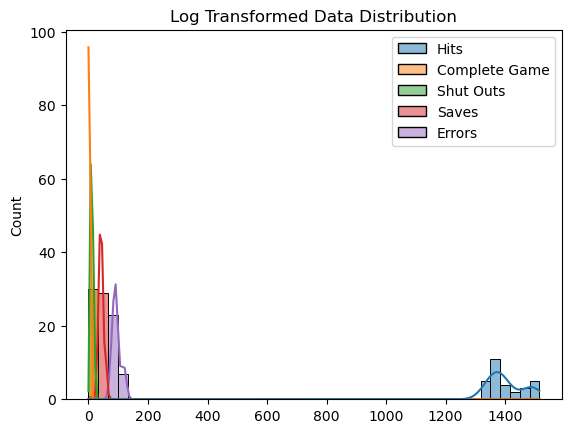

In [75]:
col_name = ['Hits', 'Complete Game', 'Shut Outs', 'Saves', 'Errors']

df1[col_name] = np.log1p(df[col_name])

sns.histplot(df[col_name], kde=True)
plt.title('Log Transformed Data Distribution')
plt.show()


In [76]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.738455
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base On Balls         0.151193
Strike Outs          -0.233815
Stole Base            0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game        -0.275681
Shut Outs            -0.598073
Saves                 0.109983
Errors                0.586101
dtype: float64

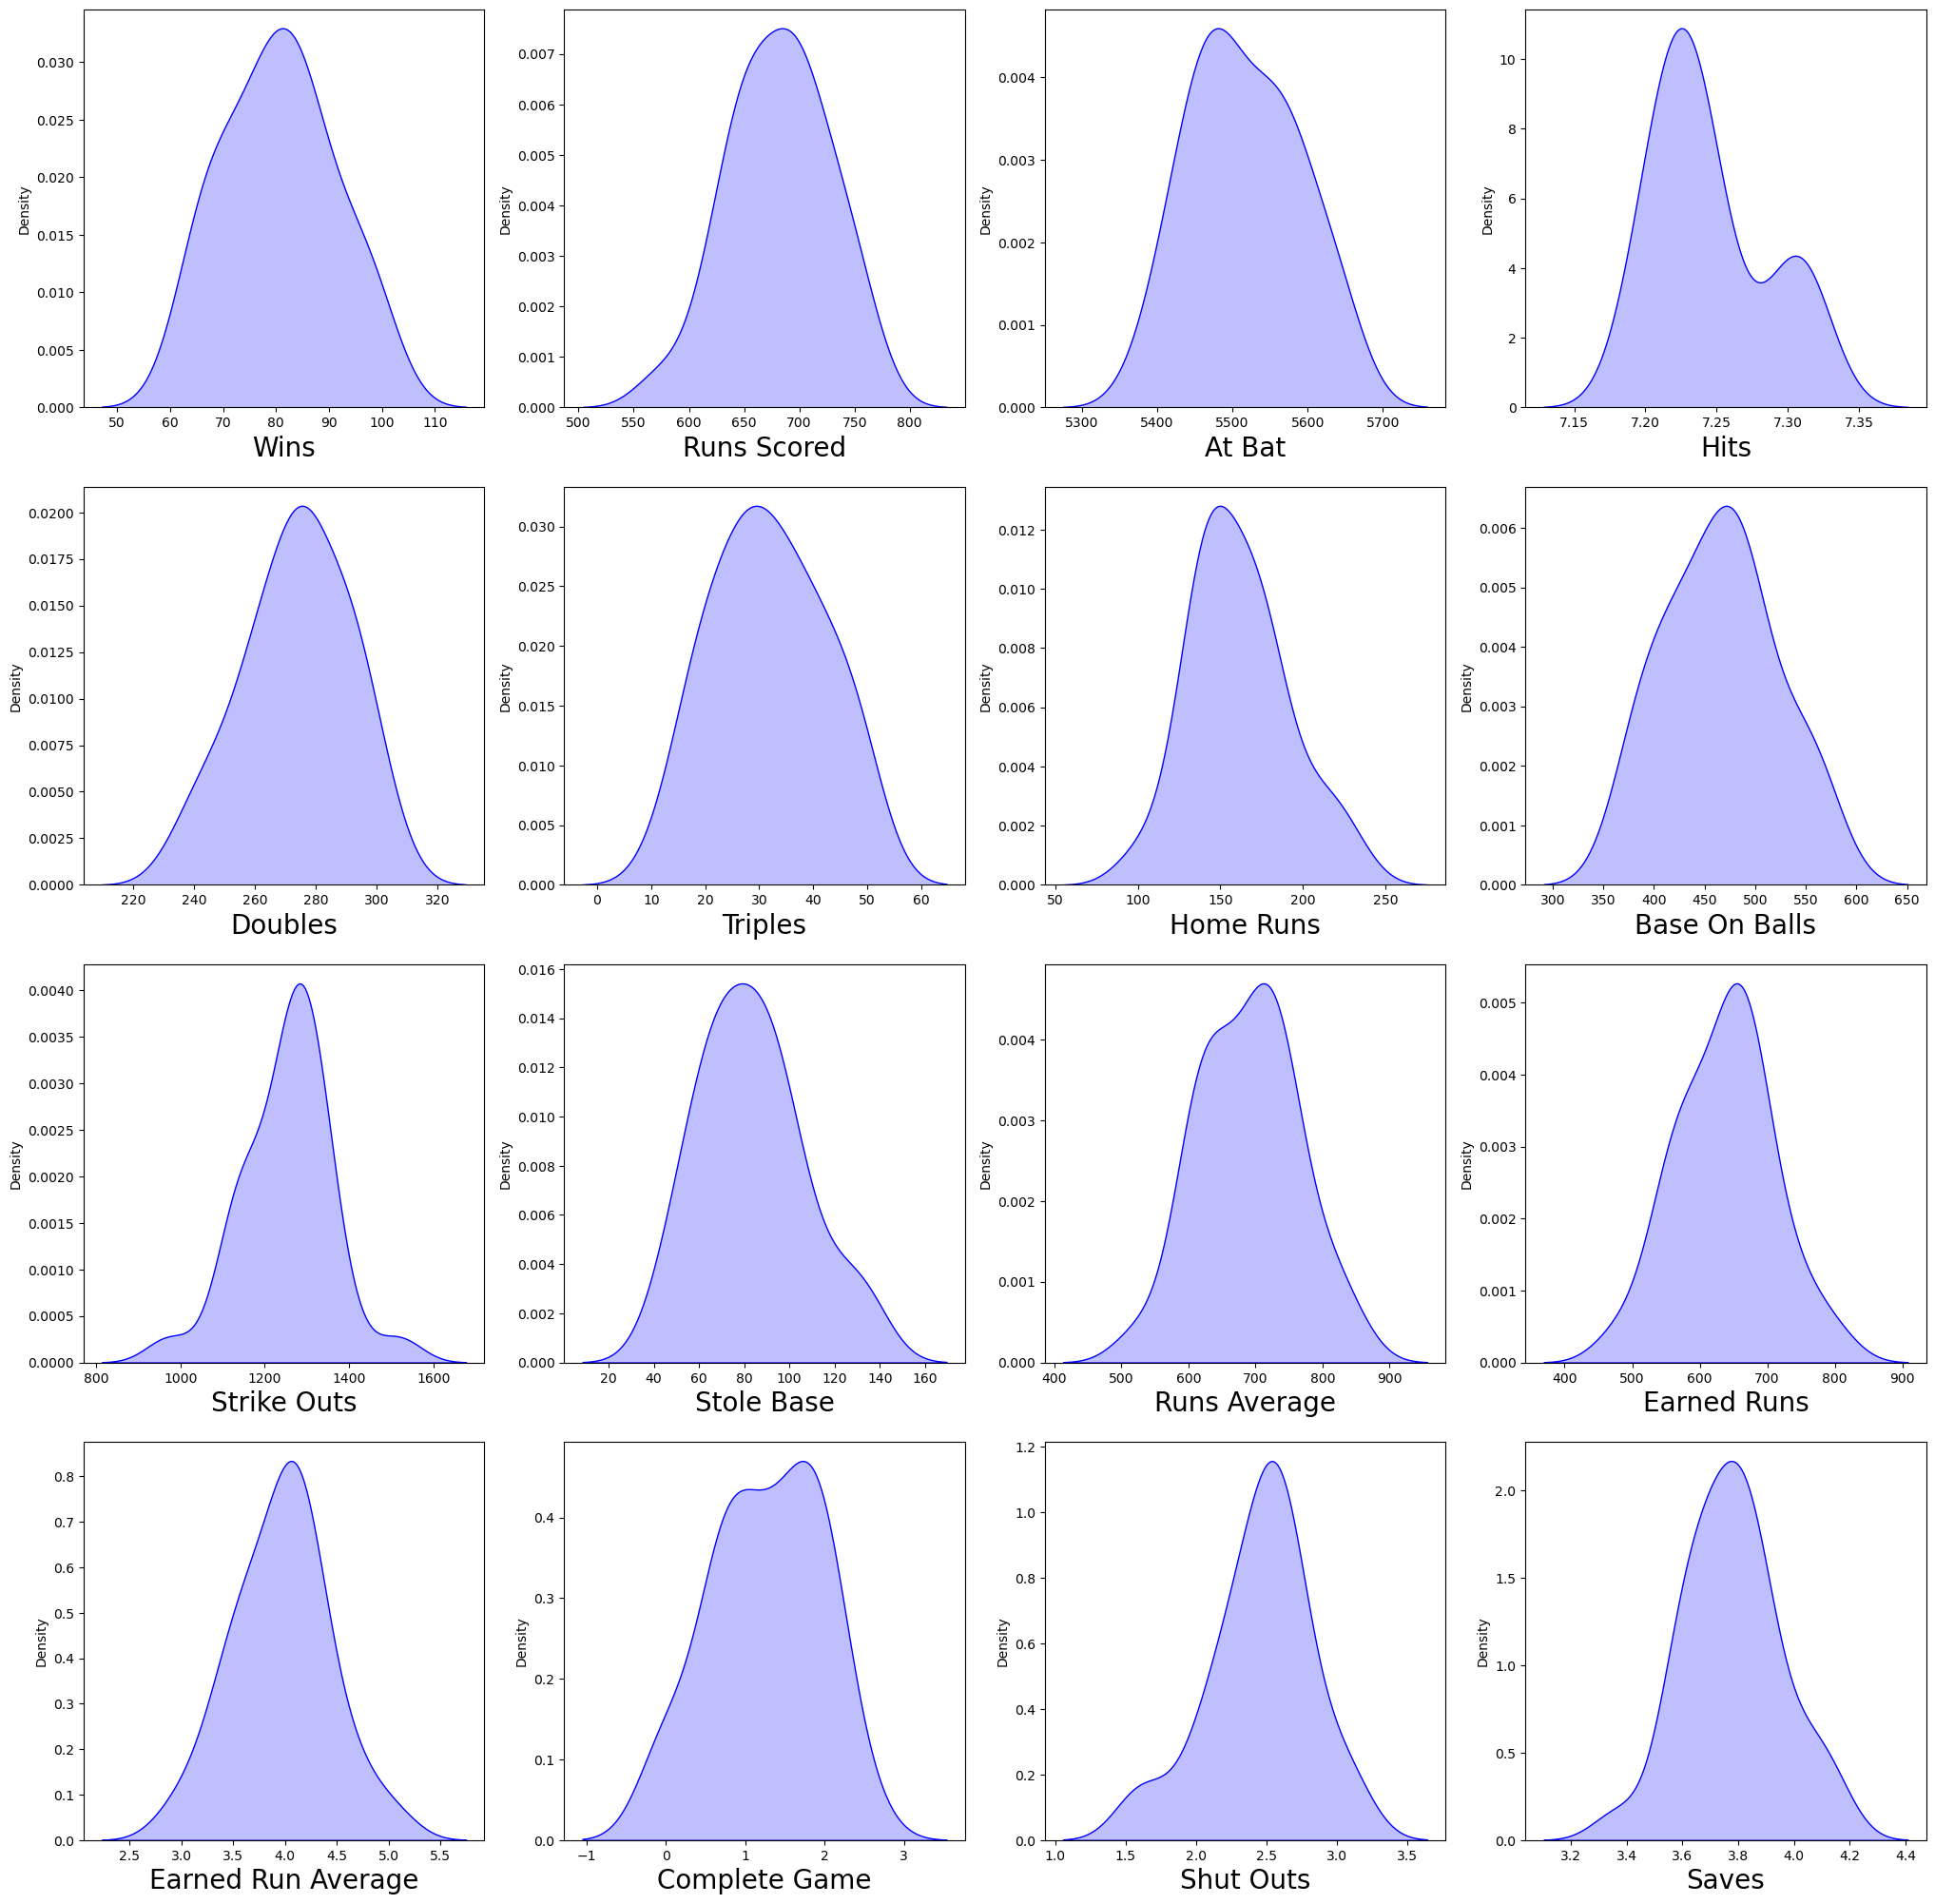

In [78]:
plt.figure(figsize=(25,25))
plotnumber=1
for column in df1:
    if plotnumber <=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.kdeplot(df1[column], color ='b',fill=True)
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

# Comment:- 
All feature skewness is now transformed within permissible limit of -0.5 to 0.5 aas shown

# Correlation Between Dataset Columns

<Axes: >

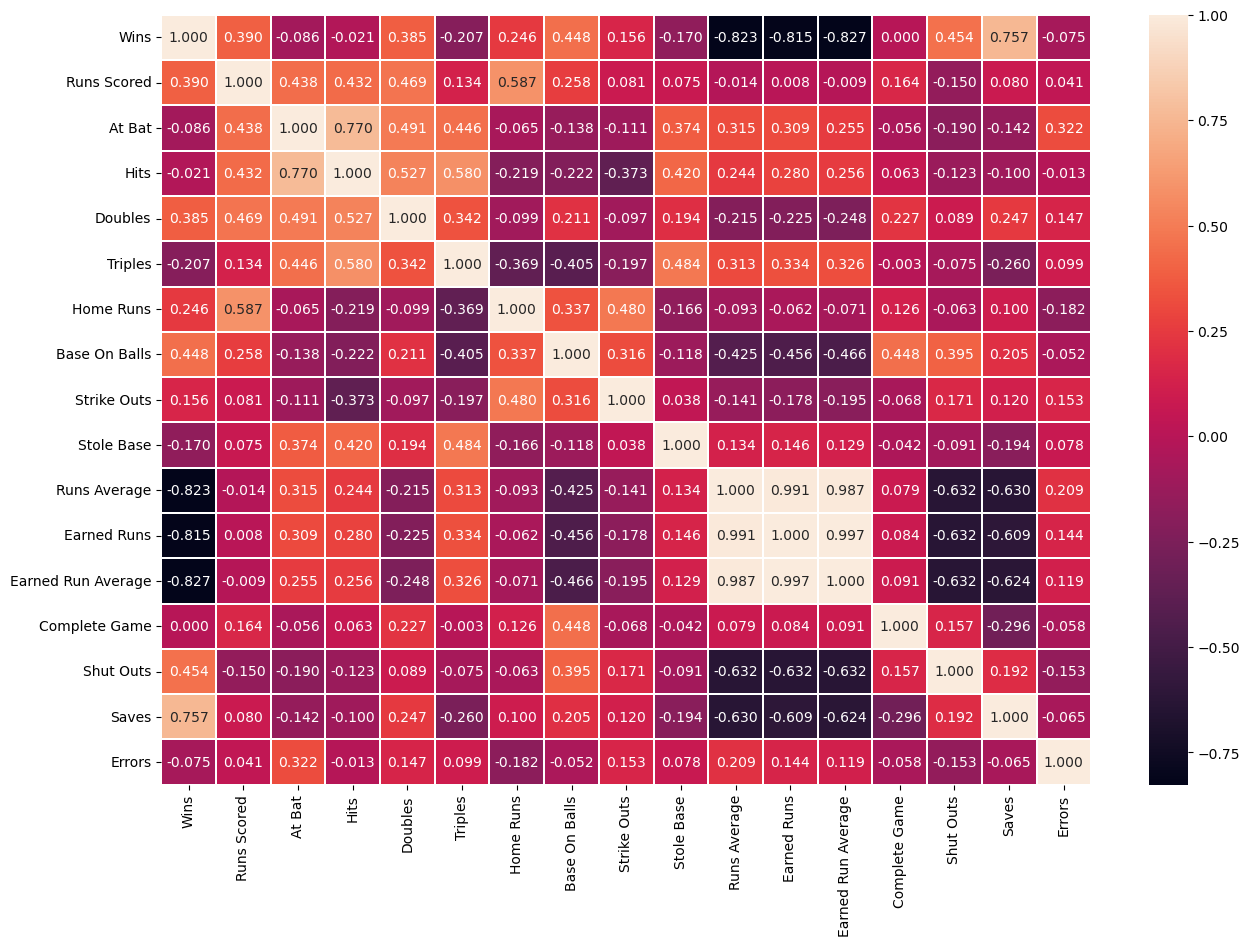

In [80]:
# Correlation Analysis Using Heatmap
plt.figure(figsize= (15,10))
sns.heatmap(df1.corr(), linewidth = 0.1, fmt='0.3f', annot = True)

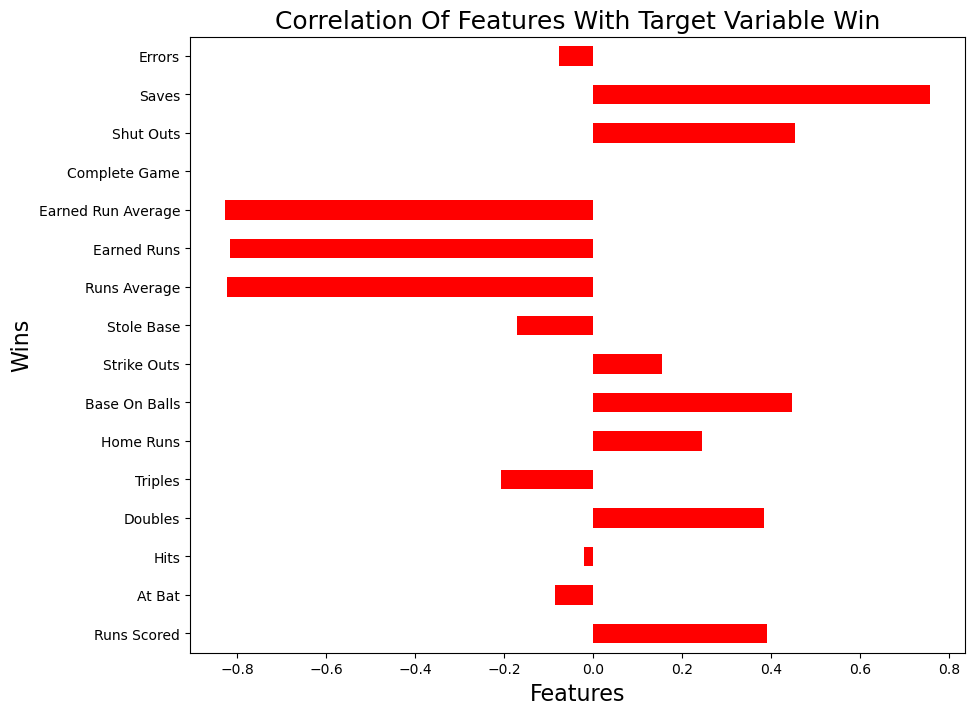

In [93]:
# correlation Of Features with target variable "win".
plt.figure(figsize= (10,8))
df1.corr()['Wins'].drop(['Wins']).plot(kind = 'barh', color= 'r')
plt.xlabel('Features', fontsize= 16)
plt.ylabel('Wins', fontsize = 16)
plt.title('Correlation Of Features With Target Variable Win', fontsize=18)
plt.show()

# Comment:- We can observe the correlation of Dataset through this heatmap and bargraph
    
'Runs Average', 'Earned Runs', and 'Earned Run Average' have strong correlation. and these columns have negative correlation to column "Wins"

In [94]:
#Checking multicollinearity using Varience-inflation-factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df.shape[1])]
vif['Features'] = df1.columns
vif

,VIF,Features
0,1251.442420,Wins
1,2617.409490,Runs Scored
2,125947.045153,At Bat
3,129711.729334,Hits
4,994.113778,Doubles
5,33.608740,Triples
6,205.509670,Home Runs
7,258.650713,Base On Balls
8,411.701884,Strike Outs
9,27.235606,Stole Base


# Comment-
Here we can see that 'Runs Average','Earned Runs'and 'Earned Run Averge' are highly correlated.
And reason is data is not scaled.

# Standard Scaling 

In [96]:
X=df1.iloc[:,1:-1]
y=df1.iloc[:,0]

In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [98]:
X_scaled=scaler.fit_transform(X)

# Principal Component Analysis (PCA)

PCAis a dimensionality reduction technique that transforms correlated variables into a set of linearly uncorrelated variables (Principal Components)

Implementing PCA can help address multicolliniearity

In [100]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [101]:
X_=pd.DataFrame(X_pca,columns=np.arange(15))

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X_.values, i)
                          for i in range(len(X_.columns))]
vif_data

,Features List,VIF Value
0,Runs Scored,1.0
1,At Bat,1.0
2,Hits,1.0
3,Doubles,1.0
4,Triples,1.0
5,Home Runs,1.0
6,Base On Balls,1.0
7,Strike Outs,1.0
8,Stole Base,1.0
9,Runs Average,1.0


In [103]:
X_.skew()

0     0.072786
1    -0.103351
2     0.093333
3    -0.183638
4     0.231328
5     0.113868
6     0.695706
7     0.041014
8     0.147935
9     0.742452
10    0.776093
11    0.079855
12    0.234348
13    0.344537
14    0.341381
dtype: float64


# Machine Learning

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [109]:
maxR2_score=0
maxRS=0
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=i, test_size=.2)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
        
print('Best R2 Score is: ', (maxR2_score)*100 ,'\nAt Random State: ', maxRS)

Best R2 Score is:  95.16954924533552 
At Random State:  160


# Prediction Based On Model

In [110]:
pred_data=pd.DataFrame({'predicted values':y_pred,'actual values':y_test})
pred_data

,predicted values,actual values
16,95.740593,98
13,80.387415,76
27,83.069431,79
26,86.818529,84
15,95.699083,100
10,87.239777,88


# Evaluation Metrics

In [111]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print('\033[1m'+' Error :'+'\033[0m')
print('\nMean absolute error:',mean_absolute_error(y_test,y_pred))
print('\nMean squared error:',mean_squared_error(y_test,y_pred))
print('\nRoot Mean Sqaured Error:',np.sqrt(mean_squared_error(y_test,y_pred)))

 Error :

Mean absolute error: 3.0993203087985464

Mean squared error: 11.322422054473584

Root Mean Sqaured Error: 3.3648806894856738


# Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [113]:
maxR2_score=0
maxRS=0
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=i, test_size=.2)
    lgr.fit(X_train,y_train)
    y_pred1=lgr.predict(X_test)
    R2=r2_score(y_test,y_pred1)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
        
print('Best R2 Score is: ', (maxR2_score)*100 ,'\nAt Random State: ', maxRS)

Best R2 Score is:  92.44296577946768 
At Random State:  64


In [114]:
pred_data1=pd.DataFrame({'predicted values':y_pred1,'actual values':y_test})
pred_data1

,predicted values,actual values
16,90,98
13,74,76
27,74,79
26,95,84
15,80,100
10,83,88


# Decision Tree Classifier

In [117]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [120]:
maxR2_score=0
maxRS=0
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=i, test_size=.2)
    dtc.fit(X_train,y_train)
    y_pred2=dtc.predict(X_test)
    R2=r2_score(y_test,y_pred2)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
        
print('Best R2 Score is: ', (maxR2_score)*100 ,'\nAt Random State: ', maxRS)

Best R2 Score is:  89.7872340425532 
At Random State:  116


In [121]:
pred_data2=pd.DataFrame({'predicted values':y_pred2,'actual values':y_test})
pred_data2

,predicted values,actual values
16,86,98
13,83,76
27,68,79
26,97,84
15,80,100
10,86,88


# Hyper Parameter Tuning

In [122]:
from sklearn.model_selection import GridSearchCV
lr=LinearRegression()
param={'fit_intercept' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
             }


In [123]:
gsv=GridSearchCV(lr,param,cv=5)

In [124]:
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'positive': [True, False]})

In [125]:
gsv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -2, 'positive': False}

In [126]:
model = LinearRegression(fit_intercept= True, copy_X= True, n_jobs= -2, positive= False)

In [127]:
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('R2 score: ',r2_score(y_test,pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred))
print('Mean Squared Error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))

R2 score:  0.8594942454460361
Mean Absolute Error:  3.0993203087985464
Mean Squared Error:  11.322422054473584
Root Mean Squared Error:  3.3648806894856738


In [128]:
prediction_=pd.DataFrame({'predicted values':pred,'actual values':y_test})
prediction_

,predicted values,actual values
16,95.740593,98
13,80.387415,76
27,83.069431,79
26,86.818529,84
15,95.699083,100
10,87.239777,88


# Saving Model

In [130]:
import joblib
joblib.dump(model,'Baseball_model.pkl')

['Baseball_model.pkl']

# Final Conclusion

The model saved at the end of the project was the Linear Regression model. After testing several models and evaluating their performance using metrics like R-squared, Mean Absolute Error, and Root Mean Squared Error, Linear Regression was chosen as the best-performing model. It was then saved using`joblib` for future use in making predictions on new data.